# Projet

Pour rappel, cet examen est à réaliser par groupes d'au plus trois étudiants.

Vous devez télécharger et utiliser le jeu de données suivant : MP-4MLSP.csv (source : kaggle).

Il contient les résultats d'une enquête de satisfaction menée auprès des clients d'une compagnie aérienne.

Voici la signification des différentes variables :

- Gender: Gender of the passengers (Female, Male)
- Customer Type: The customer type (Loyal customer, disloyal customer)
- Age: The actual age of the passengers
- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- Flight distance: The flight distance of this journey
- Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
- Ease of Online booking: Satisfaction level of online booking
- Gate location: Satisfaction level of Gate location
- Food and drink: Satisfaction level of Food and drink
- Online boarding: Satisfaction level of online boarding
- Seat comfort: Satisfaction level of Seat comfort
- Inflight entertainment: Satisfaction level of inflight entertainment
- On-board service: Satisfaction level of On-board service
- Leg room service: Satisfaction level of Leg room service
- Baggage handling: Satisfaction level of baggage handling
- Check-in service: Satisfaction level of Check-in service
- Inflight service: Satisfaction level of inflight service
- Cleanliness: Satisfaction level of Cleanliness
- Departure Delay in Minutes: Minutes delayed when departure
- Arrival Delay in Minutes: Minutes delayed when Arrival
- Satisfaction: Airline satisfaction level (satisfied, neutral, dissatisfied)
- Price: the flight price
-
Votre rendu se fera sous la forme d'un Notebook Python (code source et export au format PDF ou HTML).

Tous les graphiques, calculs, transformations, implémentations d'algorithmes, etc. devront être introduits, justifiés et interprétés. Une rédaction professionnelle est attendue. Elle constituera une part non négligeable du barème.

Le but de ce projet est d'effectuer des prévisions sur les variables 'Satisfaction' et 'Price".

A. Mener de façon complète une analyse exploratoire des données : graphiques, paramètres, tests, etc.

B. Classification sur la variable "Satisfaction" :
1. Compléter l'analyse exploratoire de la question 1 en se focalisant sur les relations des différentes variables avec la variable cible.
2. Prétraiter les données : choisir les variables explicatives (essayer plusieurs sélections), procéder à l'imputation des valeurs manquantes (tester plusieurs stratégies), normaliser les variables, etc.
3. Appliquer les différents algorithmes étudiés en cours. Pour chacun d'eux on procèdera ainsi : définition d'un dictionnaire d'hyperparamètres, recherche exhaustive (ou aléatoire) des meilleurs hyperparamètres, établissement de la matrice de confusion, calculs des différentes métriques (exactitude, précision, rappel, F1 score, auc, etc.).
4. Comparer les différents algorithmes.

C. Classification sur une variable dérivée de la variable "Satisfaction" :
1. Créer une variable binaire à partir la variable "Satisfaction" : on regroupera les observations des classes "Neutral" et "dissatisfied" en une seule classe.
2. Reprendre les étapes de la question 2 avec cette nouvelle variable comme variable cible.

D. Régression sur la variable "Price" :
1. Compléter l'analyse exploratoire de la question 1 en se focalisant sur les relations des différentes variables avec la variable cible.
2. Prétraiter les données : choisir les variables explicatives (essayer plusieurs sélections), procéder à l'imputation des valeurs manquantes (tester plusieurs stratégies), normaliser les variables, etc.
3. Appliquer les différents algorithmes étudiés en cours. Pour chacun d'eux on procèdera ainsi : définition d'un dictionnaire d'hyperparamètres, recherche exhaustive (ou aléatoire) des meilleurs hyperparamètres, calculs des différentes métriques (MSE, MAE, etc.).
4. Comparer les différents algorithmes.

In [606]:
# Imports

from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, StandardScaler
import seaborn as sns
import joblib
import math
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
# from sklearn.neighbors import KNeighborsRegressor, DecisionTreeRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

# Chargement du dataset

df = pd.read_csv("project.csv")

## C-1. Créer une variable binaire à partir la variable "Satisfaction" : on regroupera les observations des classes "Neutral" et "dissatisfied" en une seule classe.

In [ ]:
df['bin_satisfaction'] = df['satisfaction'].replace({
    'dissatisfied': 0,
    'neutral': 0,
    'satisfied': 1
})

print(df["bin_satisfaction"].value_counts())

## A. Mener de façon complète une analyse exploratoire des données : graphiques, paramètres, tests, etc.

In [607]:
# Informations générales

# print("Premières observations du dataframe")
# print(df.head())
# print("\n\n------------------------------------------------------------------------")
# print("\n\nNombre d'observations et de variables")
# print(df.shape)
# print("\n\n------------------------------------------------------------------------")
# print("\n\nTypes des variables")
# print(df.dtypes)
# print("\n\n------------------------------------------------------------------------")
# print("\n\nValeurs manquantes (nulles)")
# print(df.isnull().sum())
# print("\n\n------------------------------------------------------------------------")
# print("\n\nValeurs manquantes (na)")
# print(df.isnull().sum())
# print("\n\n------------------------------------------------------------------------")
# print("\n\nCalculs de base")
# print(df.describe())
# print("\n\n------------------------------------------------------------------------")
# print("\n\nInformations de base sur le dataset")
# print(df.info())

Premières observations du dataframe
   Unnamed: 0      id  Gender      Customer Type   Age   Type of Travel  \
0           0   19149  Female  disloyal Customer  19.0  Business travel   
1           1   69112    Male     Loyal Customer  54.0  Business travel   
2           2    4725  Female  disloyal Customer  23.0  Business travel   
3           3  115546    Male     Loyal Customer  58.0  Business travel   
4           4   59440    Male     Loyal Customer  45.0  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco            353.0                      3   
1  Eco Plus           1088.0                      5   
2  Business            977.0                      2   
3  Business           2932.0                      2   
4       Eco            667.0                      1   

   Departure/Arrival time convenient  ...  On-board service  Leg room service  \
0                                  4  ...                 5               5.0   
1                   

### Typer les variables

- Gender: Gender of the passengers (Female, Male) - bin
- Customer Type: The customer type (Loyal customer, disloyal customer) - bin
- Age: The actual age of the passengers - num
- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel) - bin
- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus) - ord
- Flight distance: The flight distance of this journey - num
- Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5) - ord / 0 à traiter à part
- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient - ord (0 à 5)
- Ease of Online booking: Satisfaction level of online booking - ord
- Gate location: Satisfaction level of Gate location - ord (0 - 5)
- Food and drink: Satisfaction level of Food and drink - ord (0 - 5)
- Online boarding: Satisfaction level of online boarding - ord (0 - 5)
- Seat comfort: Satisfaction level of Seat comfort - ord (0 - 5)
- Inflight entertainment: Satisfaction level of inflight entertainment - ord (0 - 5)
- On-board service: Satisfaction level of On-board service - ord (0 - 5)
- Leg room service: Satisfaction level of Leg room service - ord (0 - 5)
- Baggage handling: Satisfaction level of baggage handling - ord (0 - 5)
- Checkin service: Satisfaction level of Check-in service - ord (0 - 5)
- Inflight service: Satisfaction level of inflight service - ord (0 - 5)
- Cleanliness: Satisfaction level of Cleanliness - ord (0 - 5)
- Departure Delay in Minutes: Minutes delayed when departure - num
- Arrival Delay in Minutes: Minutes delayed when Arrival -num
- Satisfaction: Airline satisfaction level (satisfied, neutral, dissatisfied) - cat ['dissatisfied' 'satisfied' 'neutral']
- Price: the flight price - num

### C-1. Créer une variable binaire à partir la variable "Satisfaction" : on regroupera les observations des classes "Neutral" et "dissatisfied" en une seule classe.

In [609]:
variables_to_remove = ["Unnamed: 0", "id"]
bin_variables = ["Gender", "Customer Type", "Type of Travel" ]
num_variables = ["Leg room service", "Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes", "Inflight service", "Inflight wifi service", "On-board service", "Checkin service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", "Baggage handling", "Seat comfort", "Inflight entertainment", "Cleanliness"]
ord_variables = ["Class"]
targets= ["satisfaction", "Price", "bin_satisfaction"]

#Just for visualization
cat_variables= ["Gender", "Customer Type", "Type of Travel", "Leg room service", "Inflight wifi service", "Inflight service", "Departure/Arrival time convenient", "Ease of Online booking", "On-board service", "Checkin service", "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "Baggage handling", "Cleanliness", "Class", "satisfaction", "bin_satisfaction"]

### Supprimer les colonnes inutiles
Variables contenues dans la liste variables_to_remove

In [610]:
df = df.drop(variables_to_remove, axis=1)

### Analyse générale

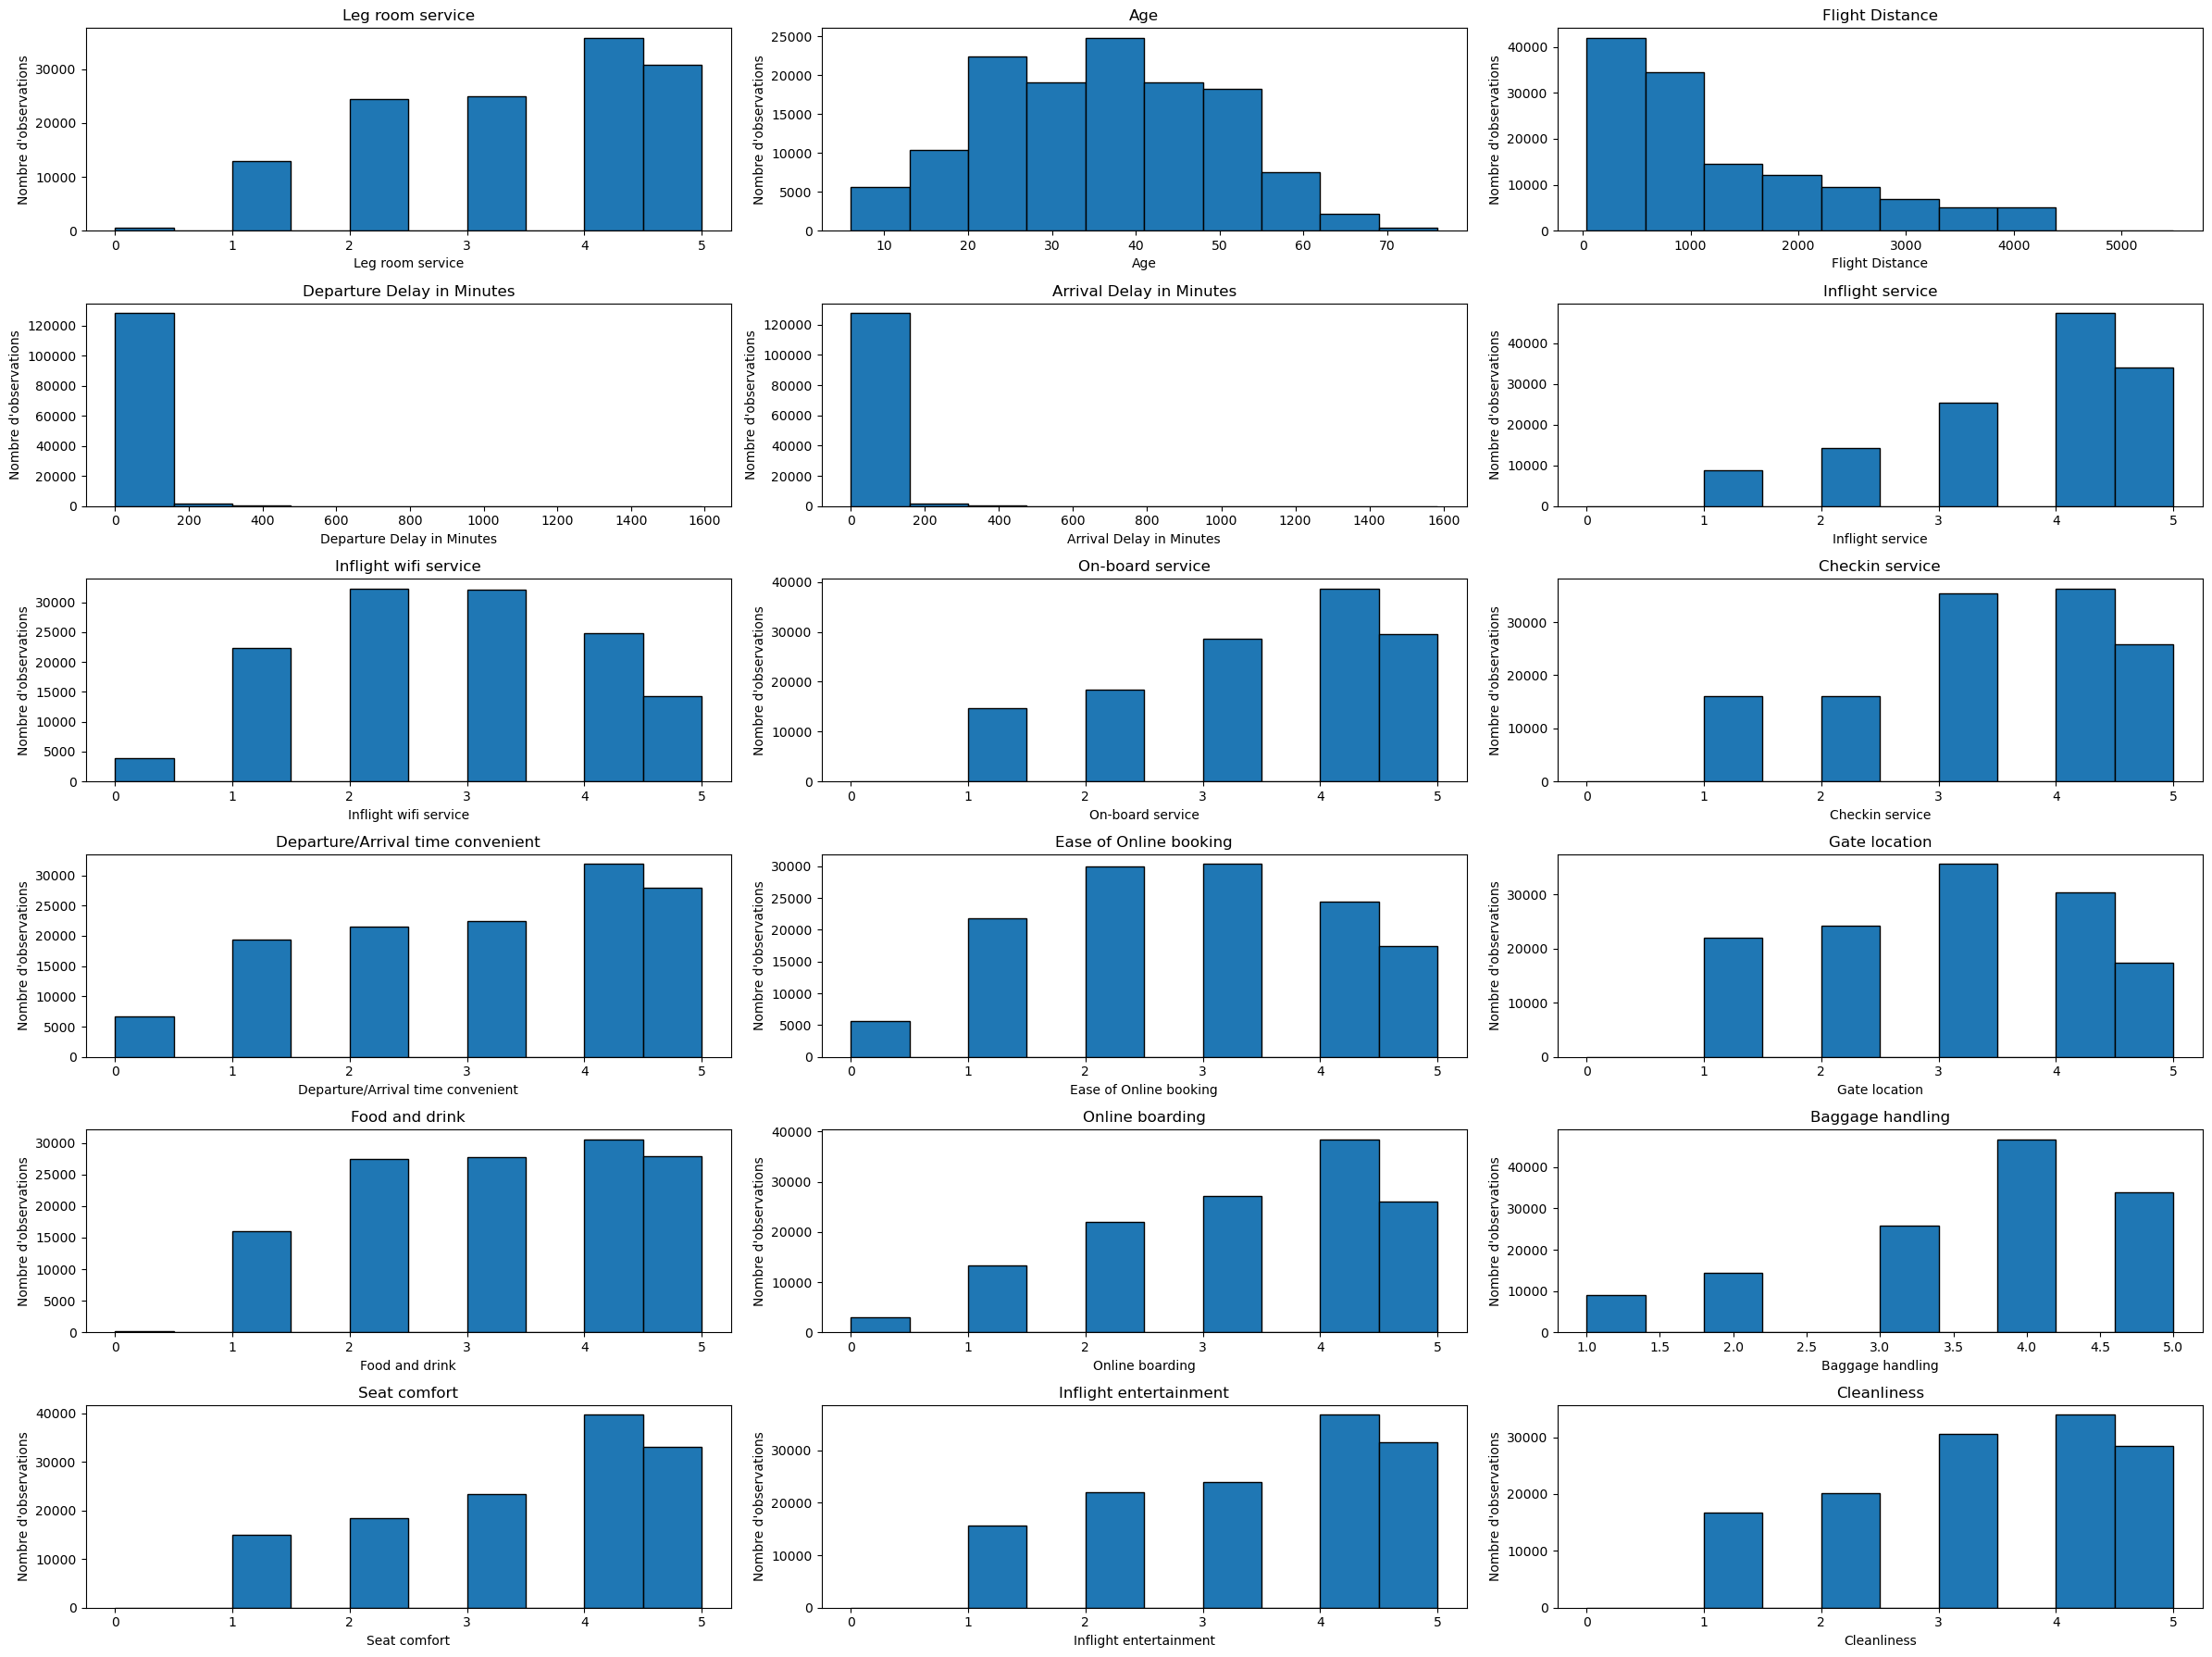

In [620]:
# determinate gaussian num_variables

n_cols = 3
n_rows = (len(num_variables) + n_cols - 1) // n_cols 

plt.figure(figsize=(8 * n_cols, 3 * n_rows)) 

for i, col in enumerate(num_variables):
    plt.subplot(n_rows, n_cols, i + 1)  
    plt.hist(df[col], edgecolor="black") #, bins=100)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Nombre d'observations")

plt.tight_layout()  
plt.show()

In [621]:
gauss_variables = ["Age", "Inflight wifi service", "Ease of Online booking", "Gate location", "Online boarding", "Seat comfort", "Cleanliness", "Leg room service"]
no_gauss_variables = ["Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes", "Departure/Arrival time convenient", "Food and drink", "Inflight entertainment"]

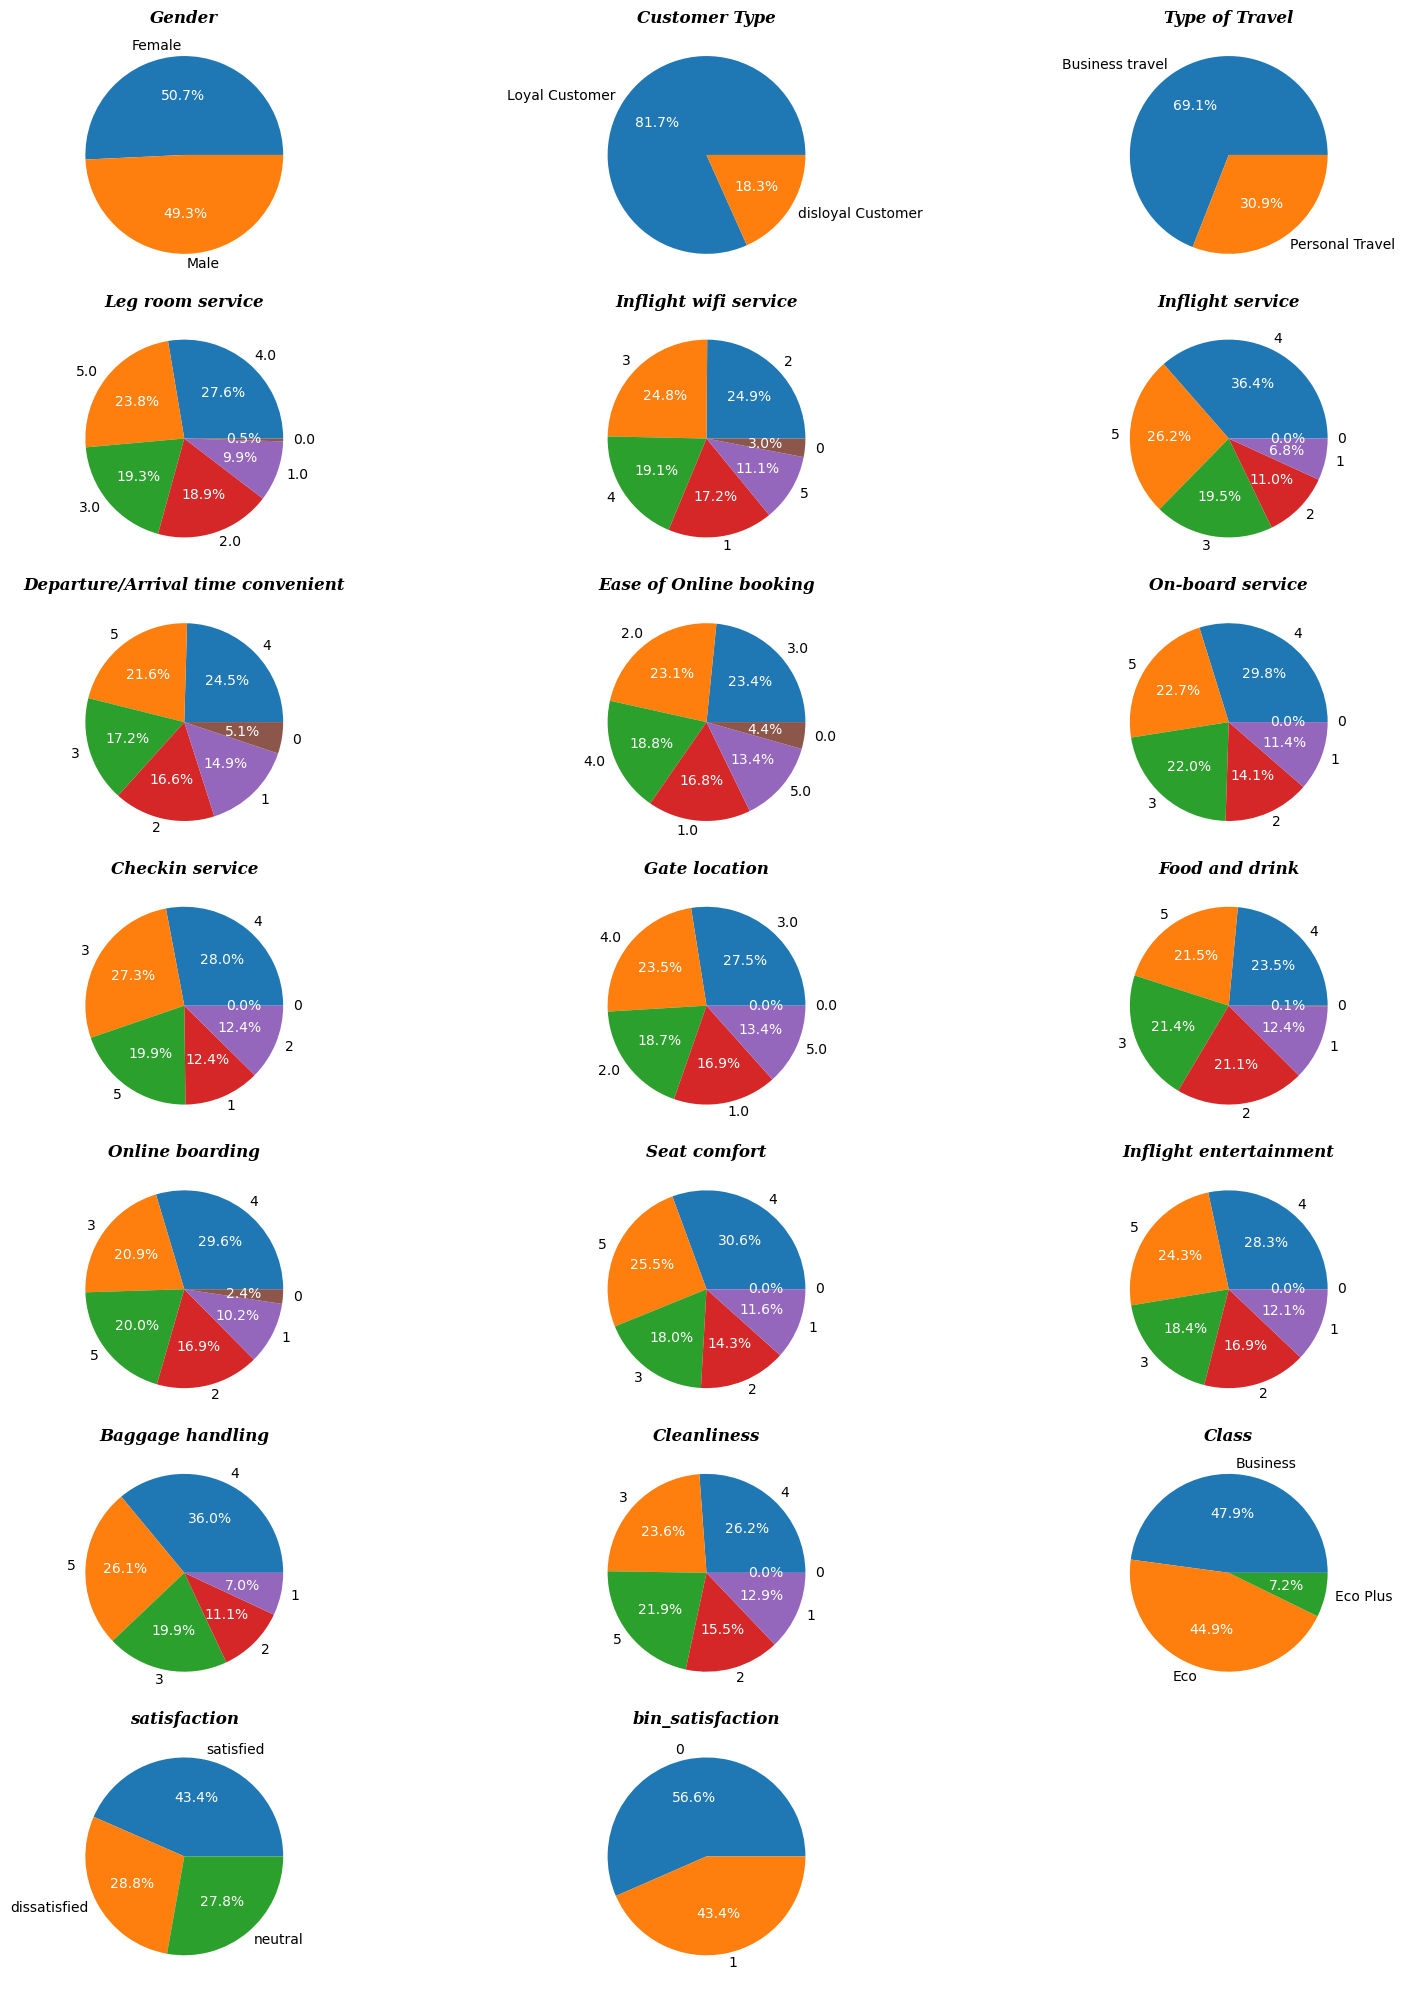

In [622]:
# Visualisation frequence/répartition for cat_variables

fig, ax = plt.subplots((len(cat_variables) + 2) // 3, 3, figsize=(16, 20))
ax = ax.flatten()
for i in range(len(cat_variables)):
    _, _, autotexts = ax[i].pie(df[cat_variables[i]].value_counts(), 
              labels=df[cat_variables[i]].value_counts().index,
              textprops={'fontsize': 10, 'color': 'black'}, 
              autopct='%1.1f%%'
              )
    for autotext in autotexts:
        autotext.set_color('white')
    ax[i].set_title(cat_variables[i], fontsize=12,
                    fontweight='bold', fontstyle='italic',
                    fontfamily='serif', color='black')
for i in range(len(cat_variables), len(ax)):
    fig.delaxes(ax[i])
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

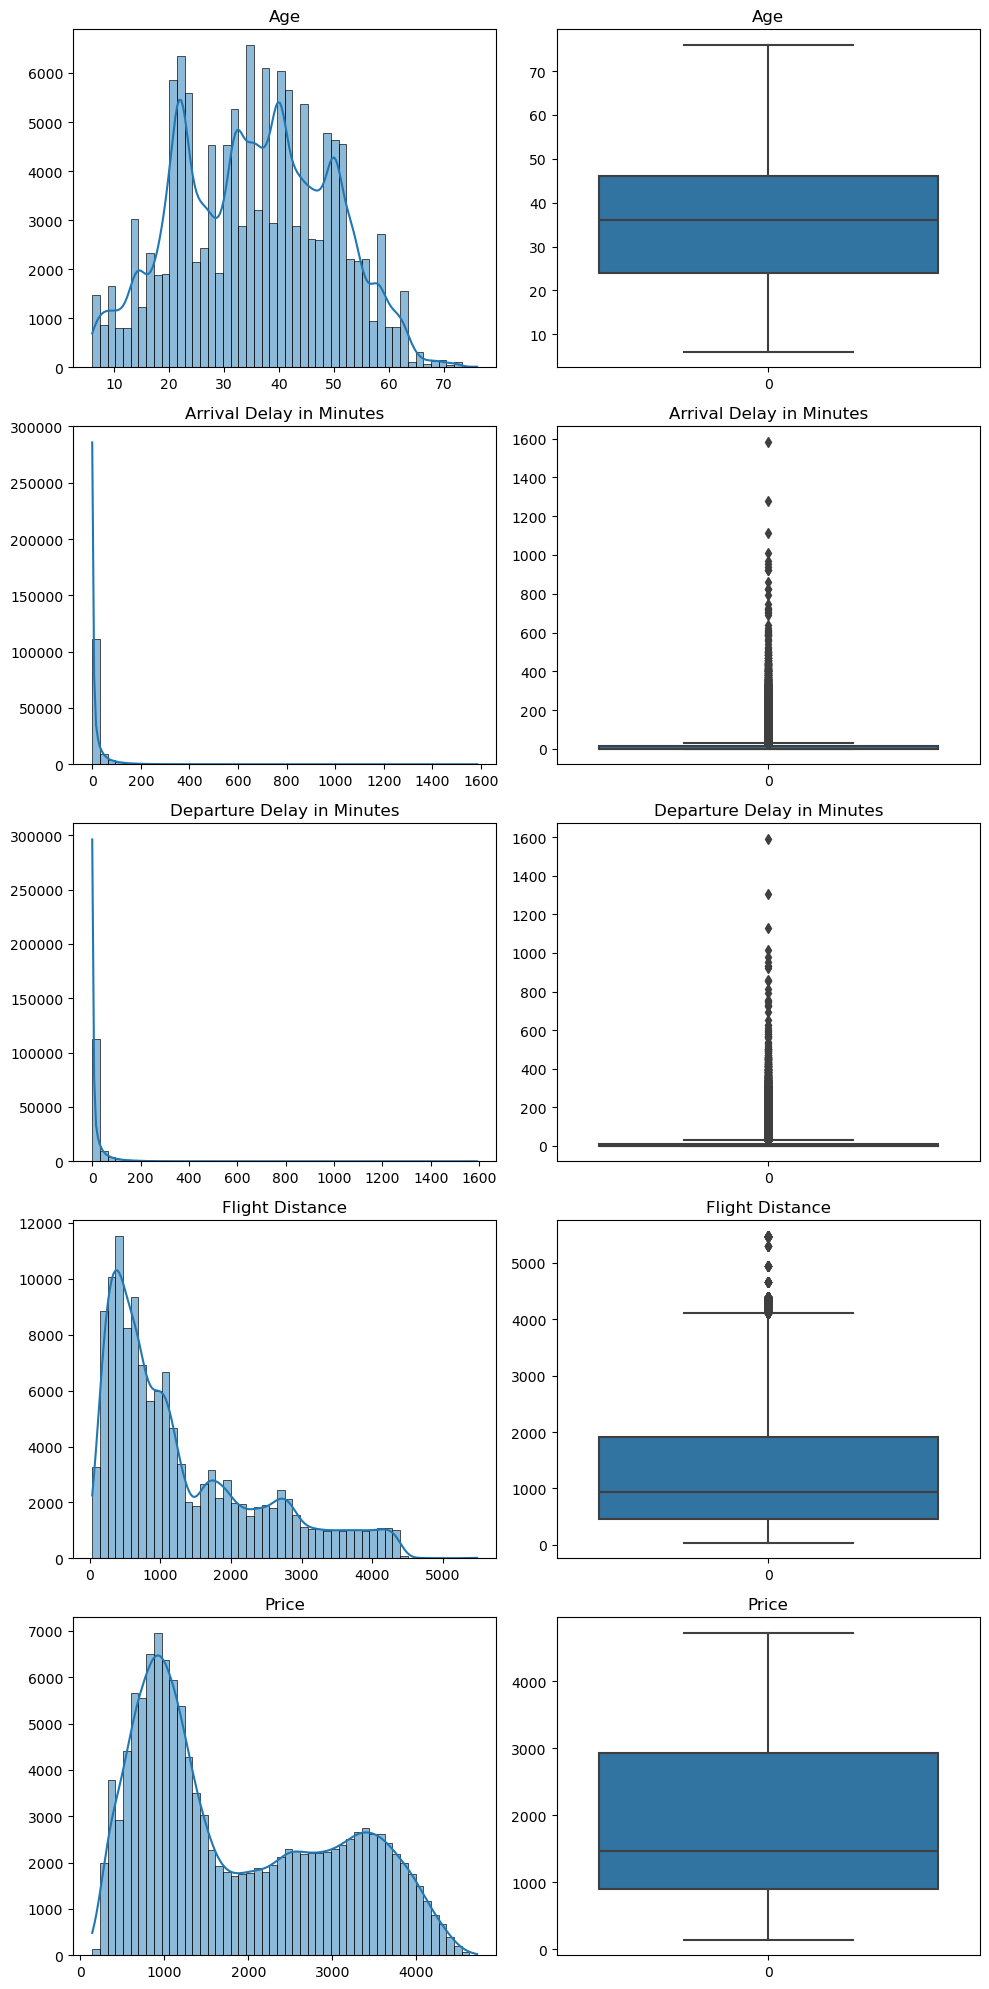

In [614]:
non_cat_variables = df.columns.difference(cat_variables)

# n_cols = 3  # Nombre de colonnes par ligne
# n_rows = (len(non_cat_variables) + n_cols - 1) // n_cols  # Calcul du nombre de lignes nécessaires

# fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Ajustement de la taille de la figure
# ax = ax.flatten()  # Aplatir le tableau d'axes pour une indexation facile

# for i, col in enumerate(non_cat_variables):
#     ax[i].hist(df[col], bins=30, color='skyblue', edgecolor='black')  # Choix de 30 barres pour l'histogramme
#     ax[i].set_title(col)
#     ax[i].set_xlabel('Valeurs')
#     ax[i].set_ylabel('Fréquence')

# # Supprimer les axes non utilisés
# for j in range(i + 1, len(ax)):
#     fig.delaxes(ax[j])

# plt.tight_layout()
# plt.show()

figure, axes = plt.subplots(len(non_cat_variables), 2, figsize=(10,4*len(non_cat_variables)))
axes = axes.flatten()
for i in range(len(non_cat_variables)):
    sns.histplot(df[non_cat_variables[i]], kde=True, ax=axes[i*2], bins=50)
    sns.boxplot(df[non_cat_variables[i]], ax=axes[i*2+1])
    axes[i*2].set_title(non_cat_variables[i])
    axes[i*2+1].set_title(non_cat_variables[i])
    axes[i*2].set_xlabel('')
    axes[i*2+1].set_xlabel('')
    axes[i*2].set_ylabel('')
    axes[i*2+1].set_ylabel('')
plt.tight_layout()
plt.show()

Les variables 'Arrival Delay in Minutes' and 'Departure Delay in Minutes' montrent de nombreuses anomalies (point en dehors des moustaches) = pour augmenter l'efficacité des algorithmes, il faut rendre la répartition des valeurs plus "normale".

In [615]:
#Skewness doit avoisiner 1

df['Arrival Delay in Minutes'].skew()
# Asymétrie ≈ 6
np.log1p(df['Arrival Delay in Minutes']).skew()
# Skewness ≈ 0.87

df['Departure Delay in Minutes'].skew()
# Skewness ≈ 6.77
np.log1p(df['Departure Delay in Minutes']).skew()
#Skewness ≈ 0.92

0.9166444459951216

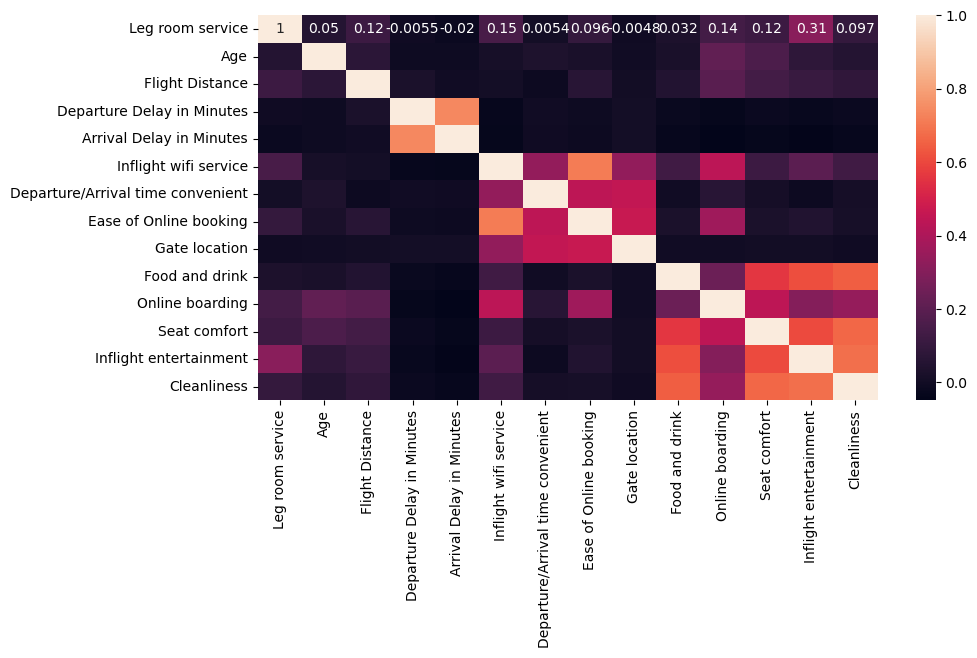

In [559]:
correlation_matrix = df[num_variables].corr(method='spearman')
plt.subplots(figsize=(10,5))
sns.heatmap(data = correlation_matrix, annot=True)
plt.show()

Variables qui semblent liées (ordre croissant):
- Cleanliness => Inflight entertainment, & Food and drink
- **Departure Delay in Minutes & Arrival Delay in Minutes**

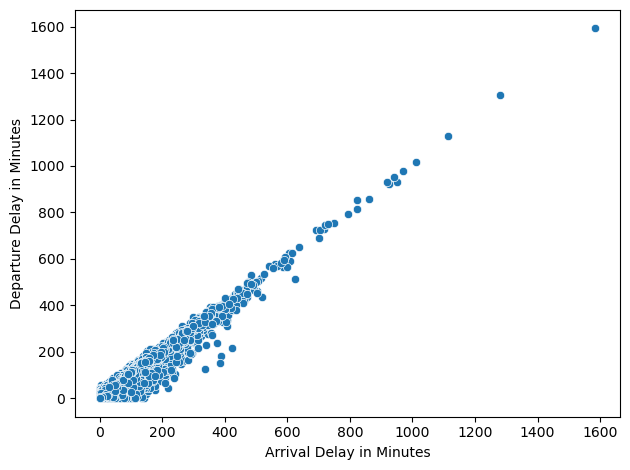

In [616]:
sns.scatterplot(data=df, x='Arrival Delay in Minutes', y='Departure Delay in Minutes')
plt.tight_layout()
plt.show()

Chaque "Departure delay" est souvent corrélé à un "Arrival Delay". => relation linéaire

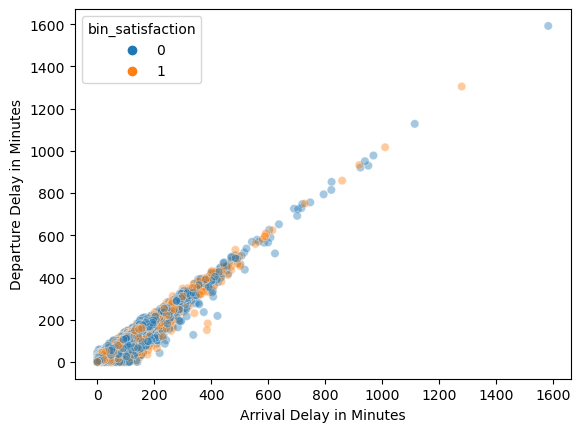

In [618]:
sns.scatterplot(data=df, x='Arrival Delay in Minutes', y='Departure Delay in Minutes', hue='bin_satisfaction', alpha=0.4);


Homogénéité entre satisfaction et insatisfaction, peu importe le délai.

## B.1. Compléter l'analyse exploratoire de la question 1 en se focalisant sur les relations des différentes variables avec la variable cible (satisfaction).

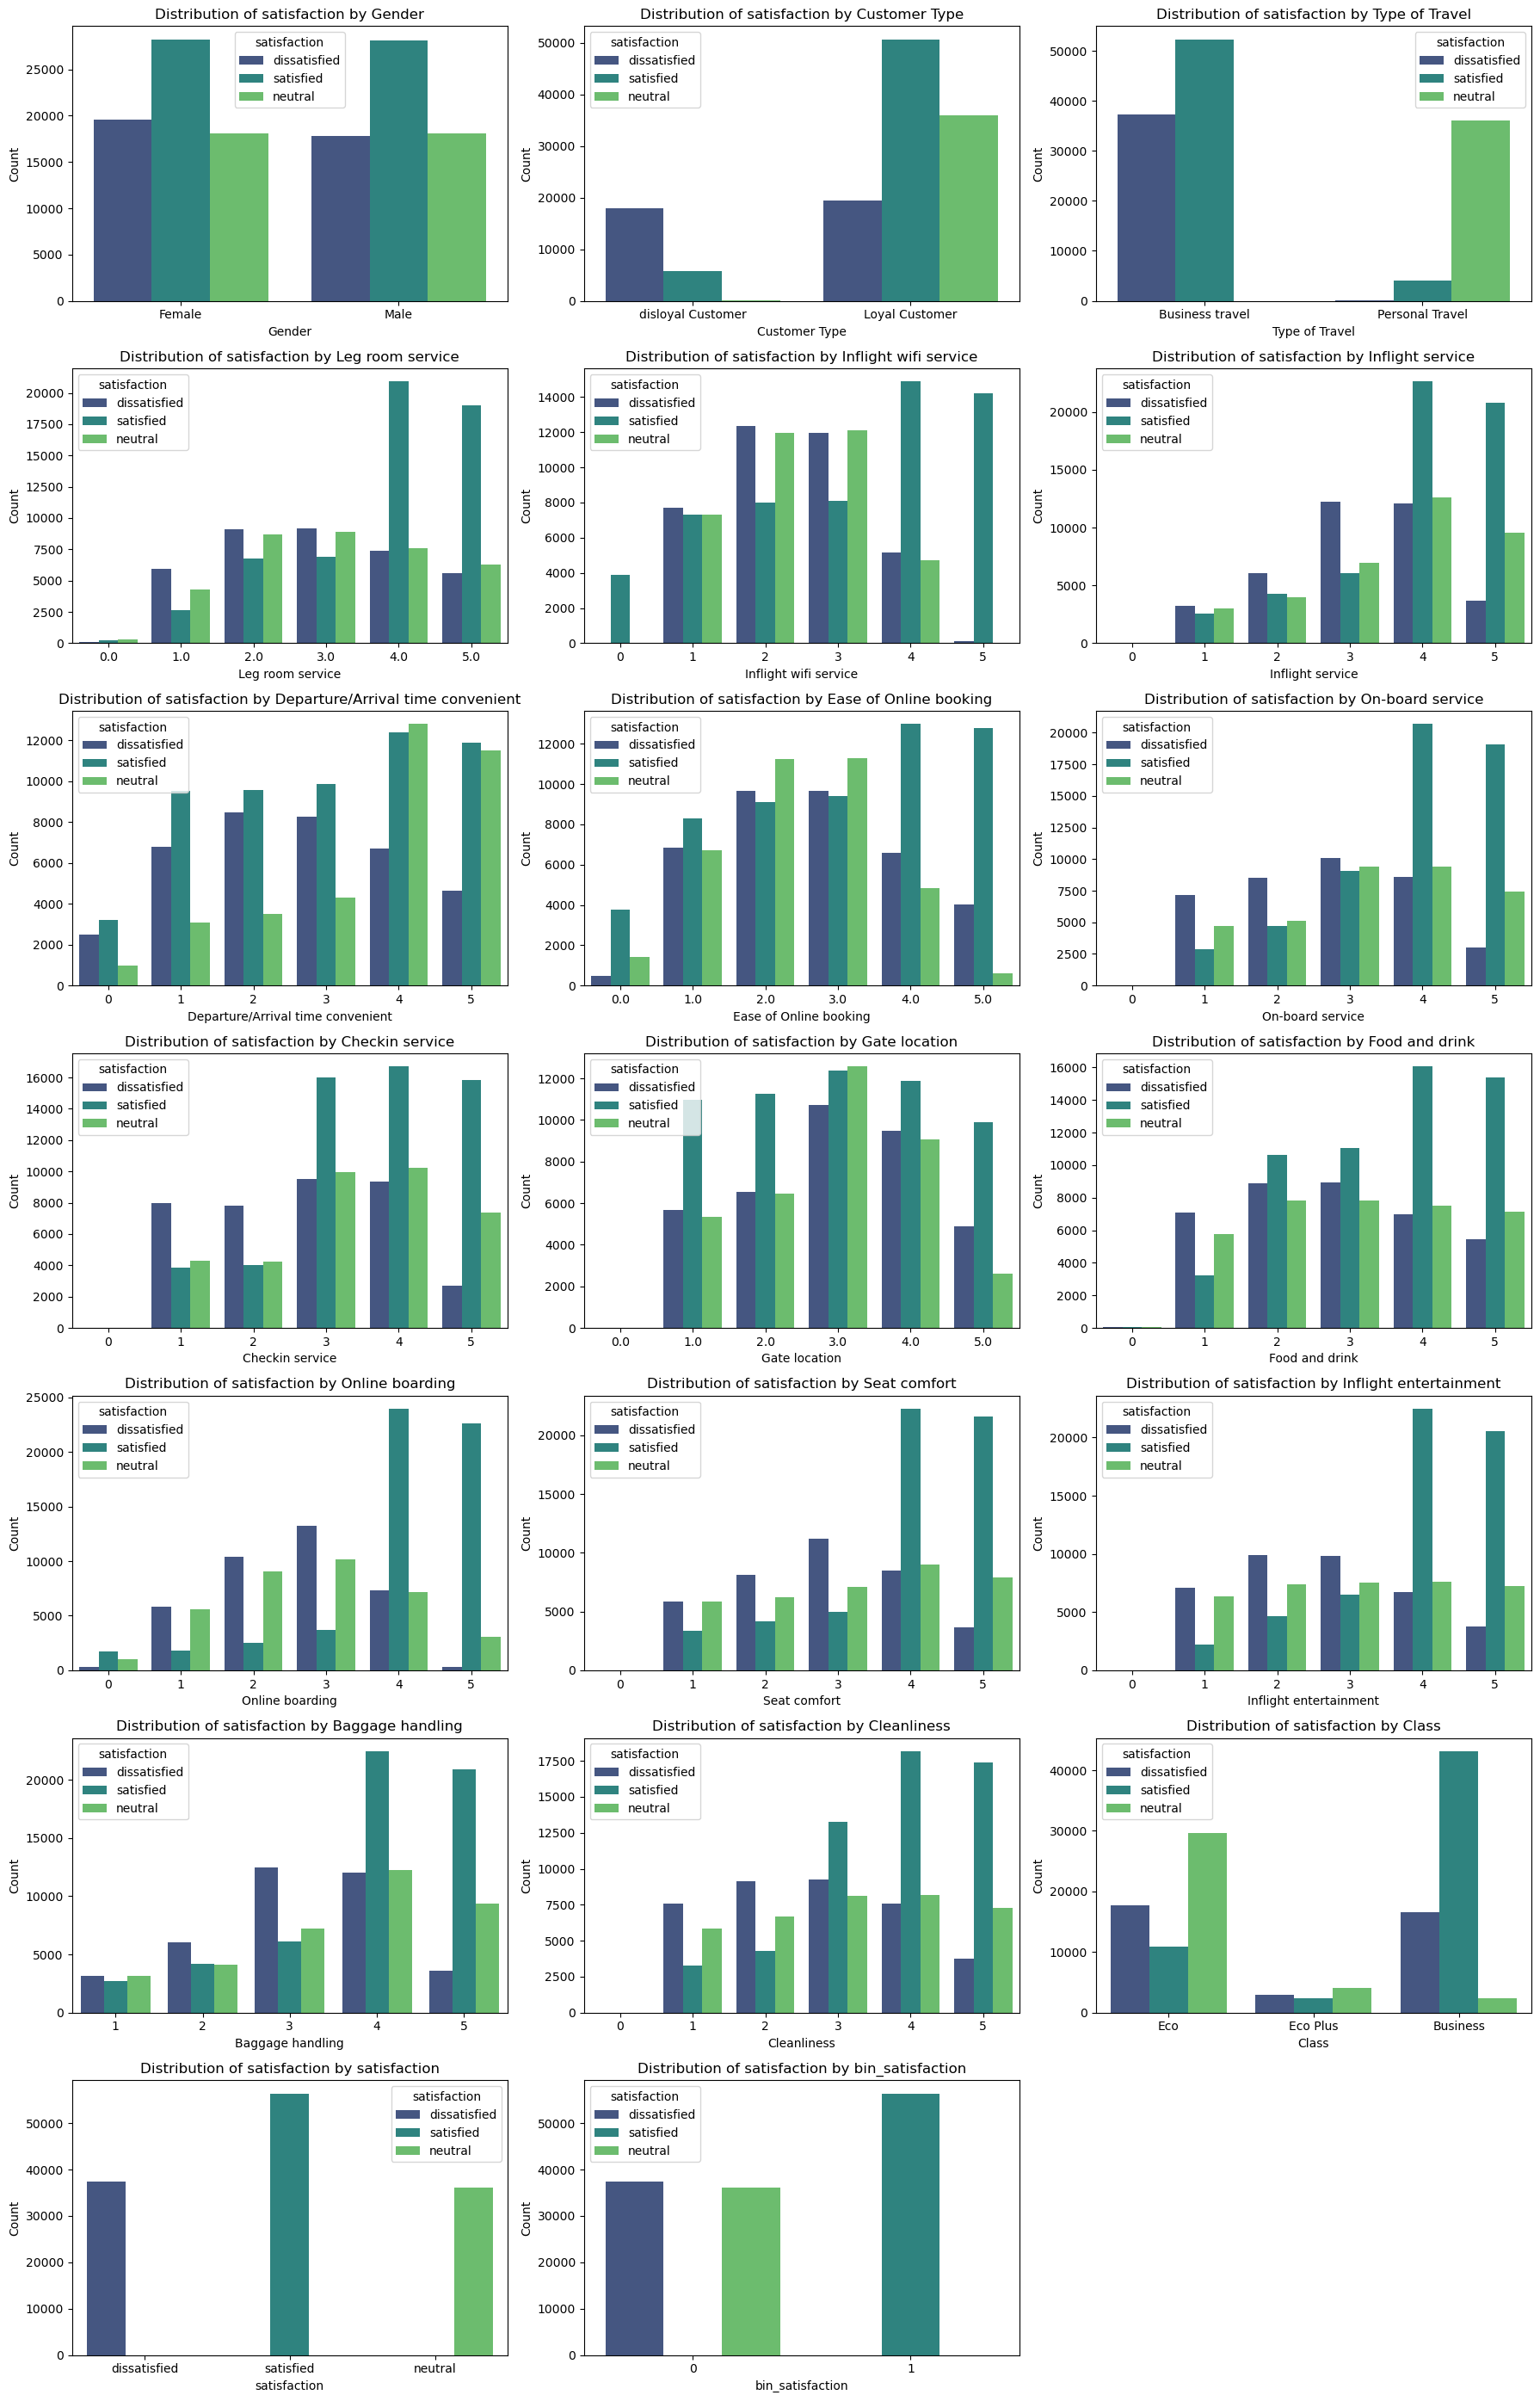

In [624]:
n_cols = 3  # Nombre de graphiques par ligne
n_rows = (len(cat_variables) + n_cols - 1) // n_cols  # Calcul du nombre de lignes nécessaires

plt.figure(figsize=(6 * n_cols, 4 * n_rows))  # Ajuster la taille de la figure

for i, var in enumerate(cat_variables):
    plt.subplot(n_rows, n_cols, i + 1)  # Créer un sous-graphique
    sns.countplot(x=var, hue='satisfaction', palette="viridis", data=df)
    plt.title(f'Distribution of satisfaction by {var}')
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()  # Ajuster automatiquement les sous-graphiques pour qu'ils ne se chevauchent pas
plt.show()

/var/folders/1k/1sj3zxpx1x78x8blphwrrcrc0000gn/T/ipykernel_24793/3151135437.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['satisfaction'] == 'satisfied'][col], label='Satisfied', shade=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/1k/1sj3zxpx1x78x8blphwrrcrc0000gn/T/ipykernel_24793/3151135437.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['satisfaction'] == 'neutral'][col], label='Neutral', shade=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Fu

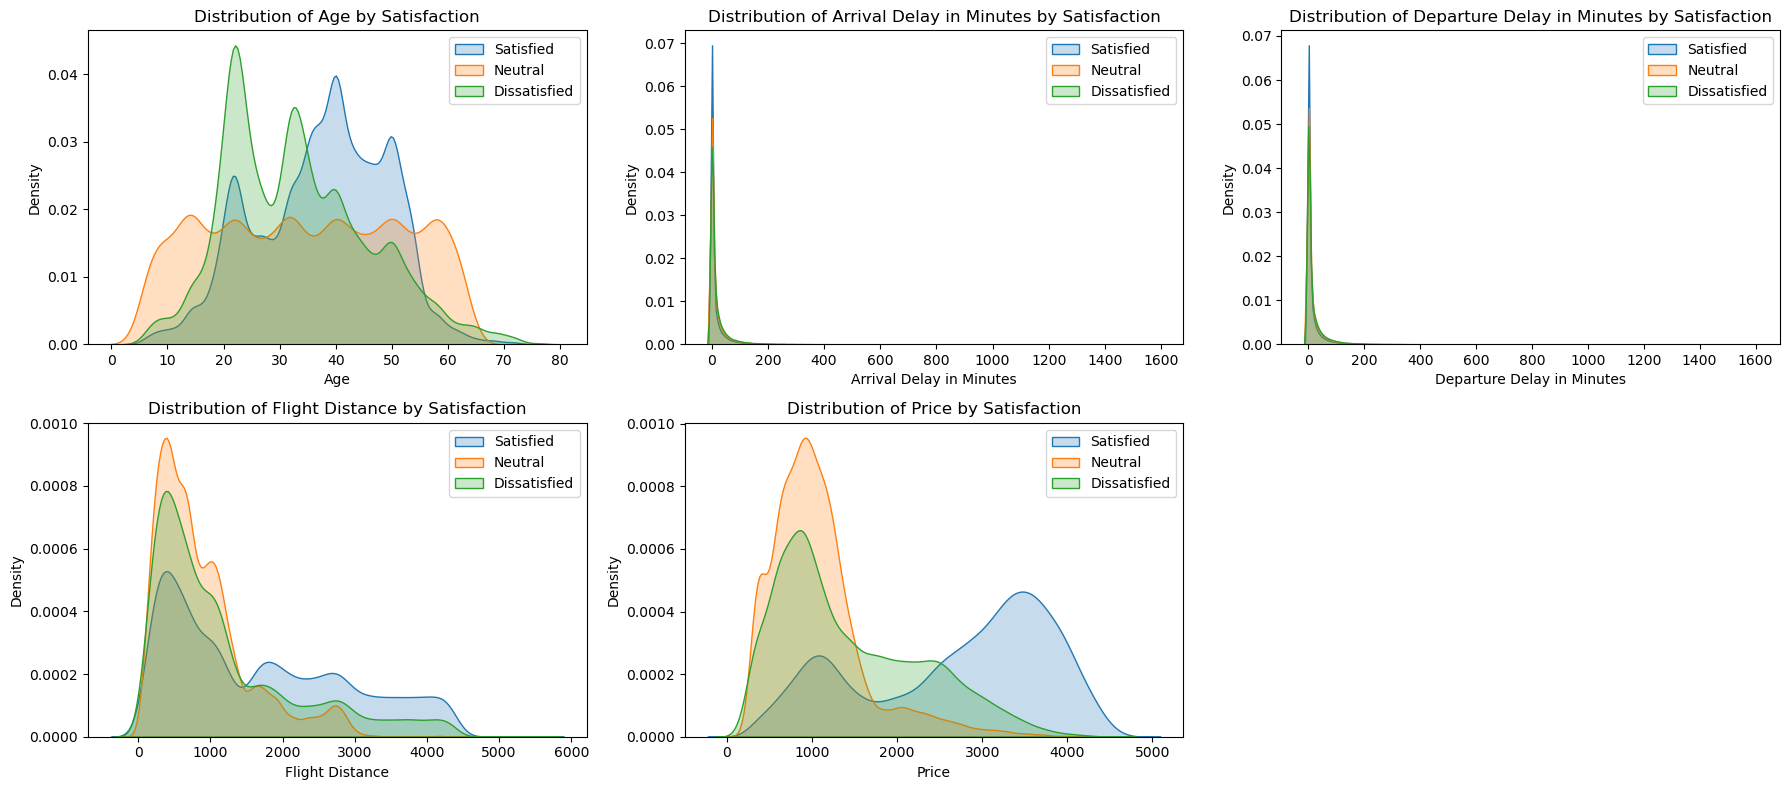

In [626]:
n_cols = 3
n_rows = (len(non_cat_variables) + n_cols - 1) // n_cols  # Calcul du nombre de lignes nécessaires

plt.figure(figsize=(6 * n_cols, 4 * n_rows))

for i, col in enumerate(non_cat_variables):
    plt.subplot(n_rows, n_cols, i + 1)  
    sns.kdeplot(data=df[df['satisfaction'] == 'satisfied'][col], label='Satisfied', shade=True)
    sns.kdeplot(data=df[df['satisfaction'] == 'neutral'][col], label='Neutral', shade=True)
    sns.kdeplot(data=df[df['satisfaction'] == 'dissatisfied'][col], label='Dissatisfied', shade=True)
    plt.title(f'Distribution of {col} by Satisfaction')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

## C.2. Reprendre les étapes de la question 2 avec cette nouvelle variable comme variable cible. (bin_satisfaction) 
(même raisonnement que pour B.2)

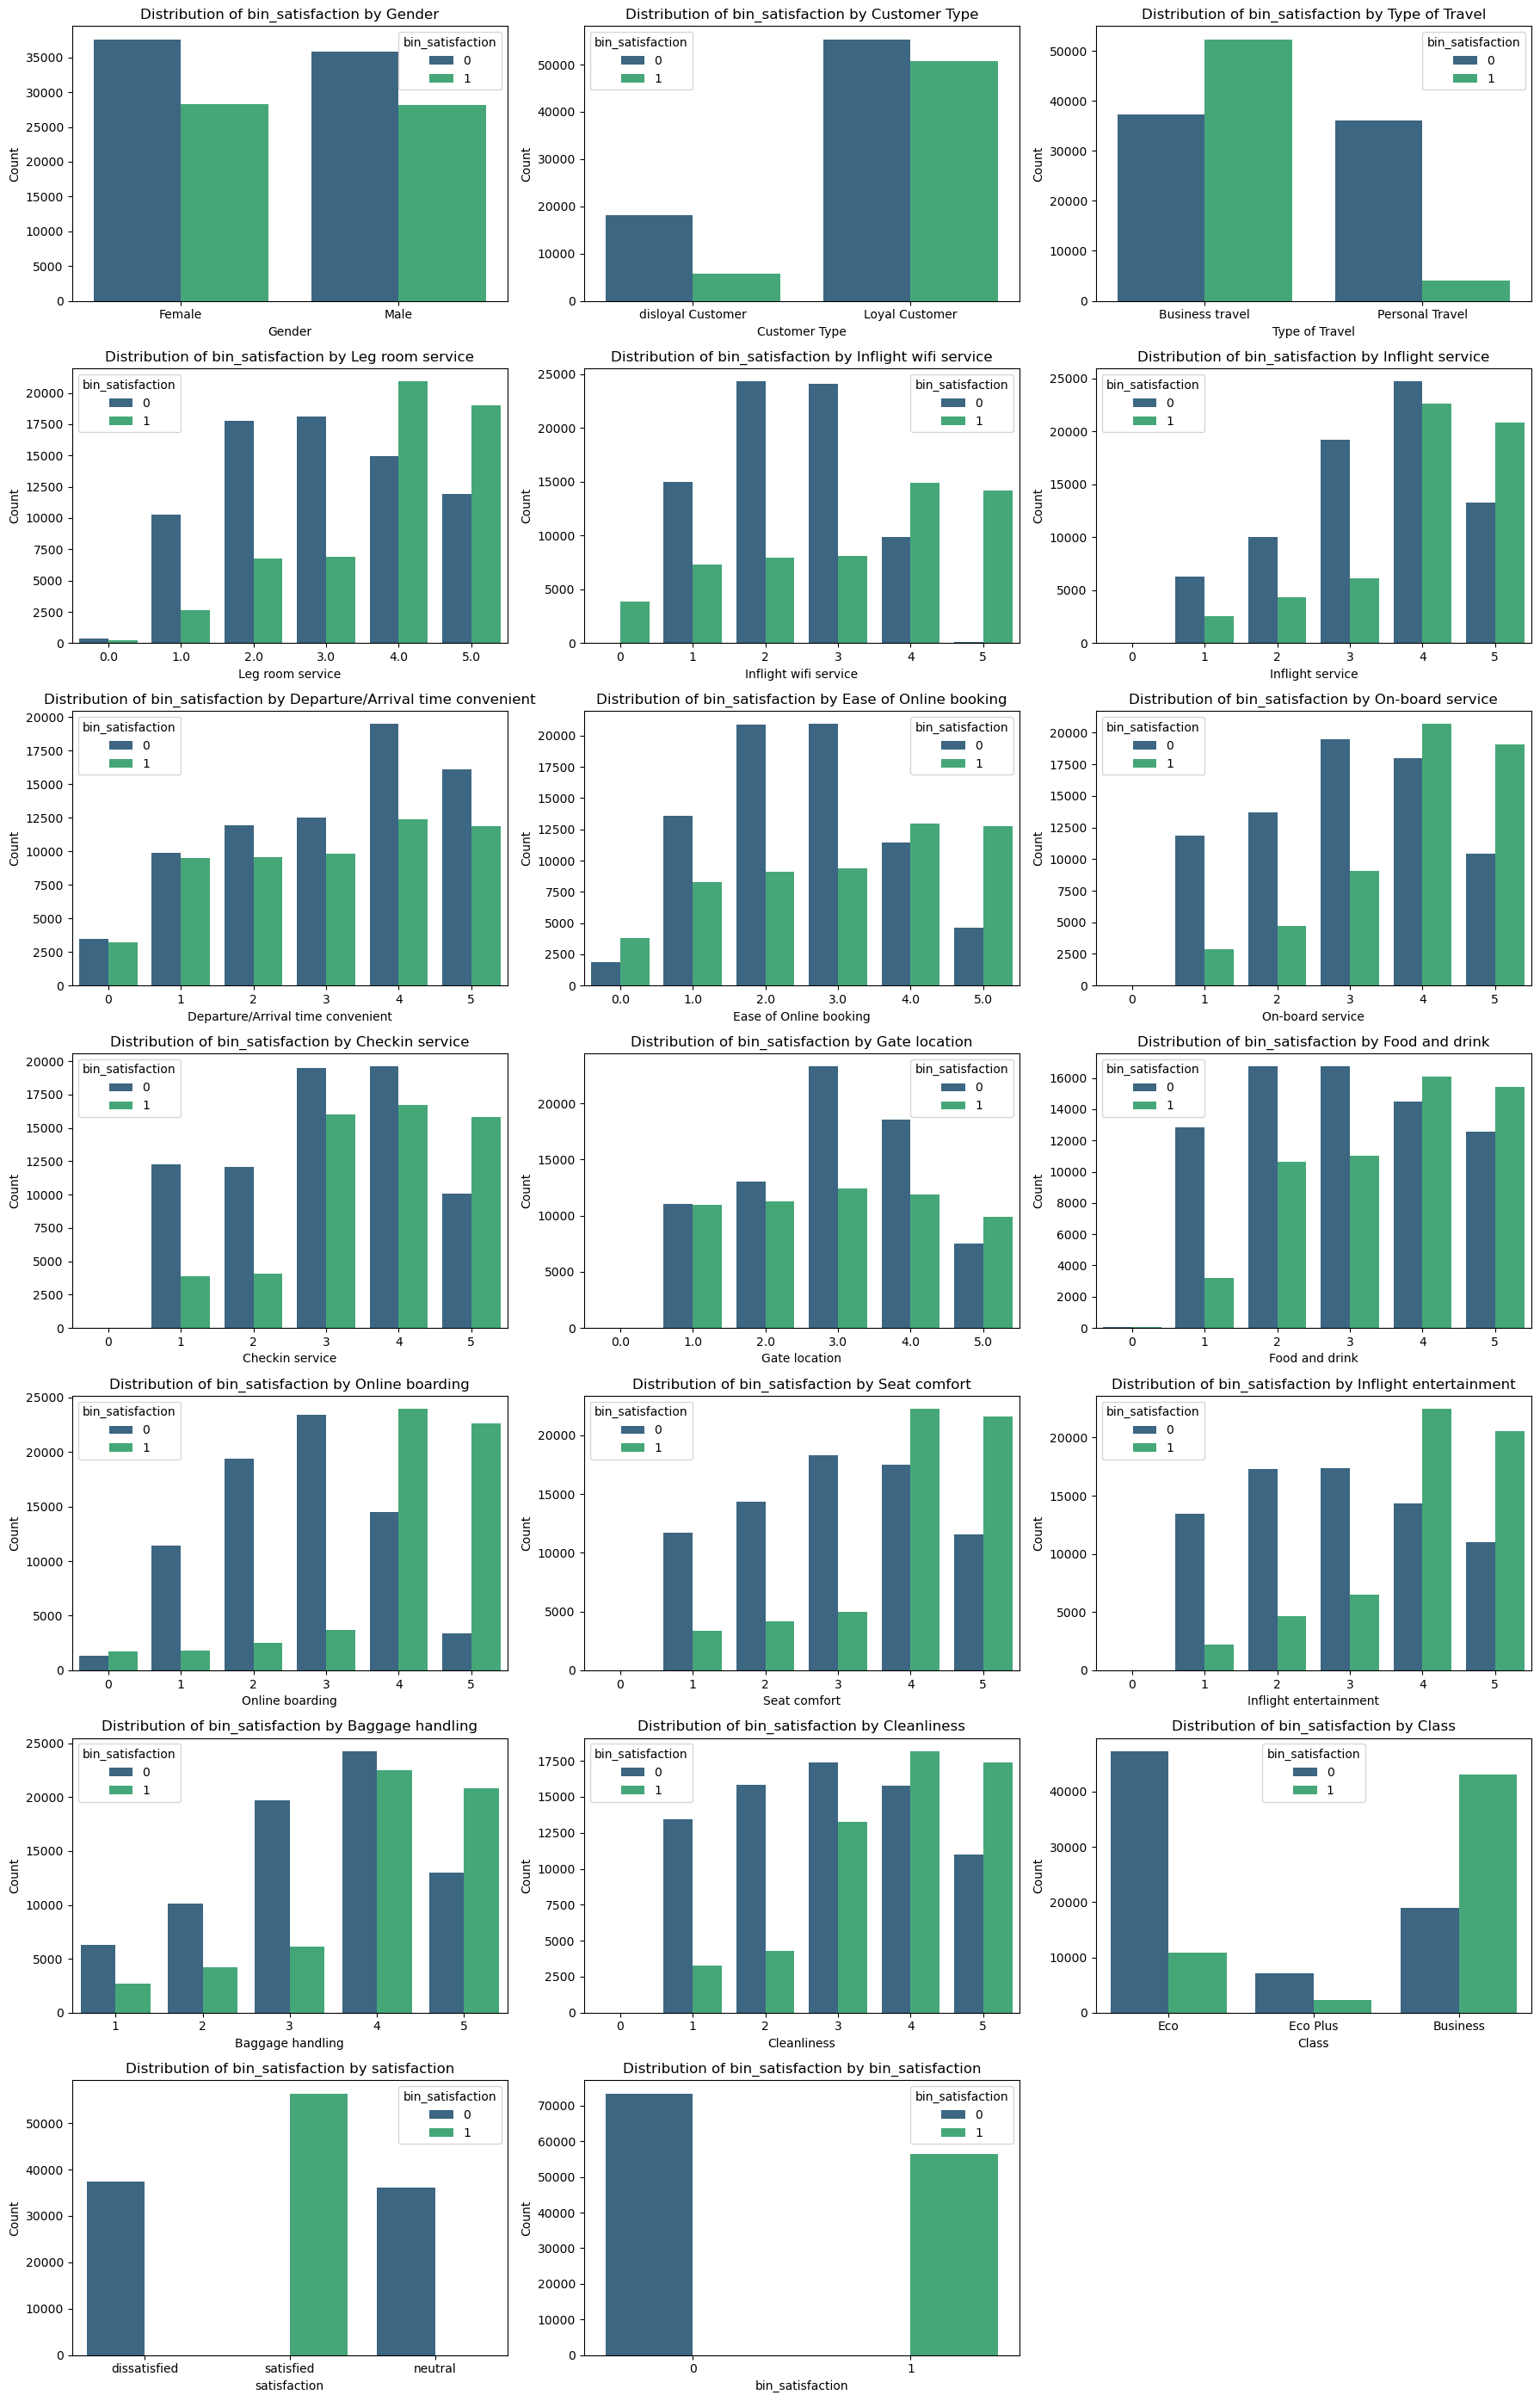

In [632]:
n_cols = 3  # Nombre de graphiques par ligne
n_rows = (len(cat_variables) + n_cols - 1) // n_cols  # Calcul du nombre de lignes nécessaires

plt.figure(figsize=(6 * n_cols, 4 * n_rows))  # Ajuster la taille de la figure

for i, var in enumerate(cat_variables):
    plt.subplot(n_rows, n_cols, i + 1)  # Créer un sous-graphique
    # Assurez-vous que 'bin_satisfaction' est une chaîne pour les légendes
    sns.countplot(x=var, hue=df['bin_satisfaction'].astype(str), palette="viridis", data=df)
    plt.title(f'Distribution of bin_satisfaction by {var}')
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()  # Ajuster automatiquement les sous-graphiques pour qu'ils ne se chevauchent pas
plt.show()

/var/folders/1k/1sj3zxpx1x78x8blphwrrcrc0000gn/T/ipykernel_24793/4216710177.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['bin_satisfaction'] == 0][col], label='Dissatified or neutral', shade=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/1k/1sj3zxpx1x78x8blphwrrcrc0000gn/T/ipykernel_24793/4216710177.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['bin_satisfaction'] == 1][col], label='Satisfied', shade=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119

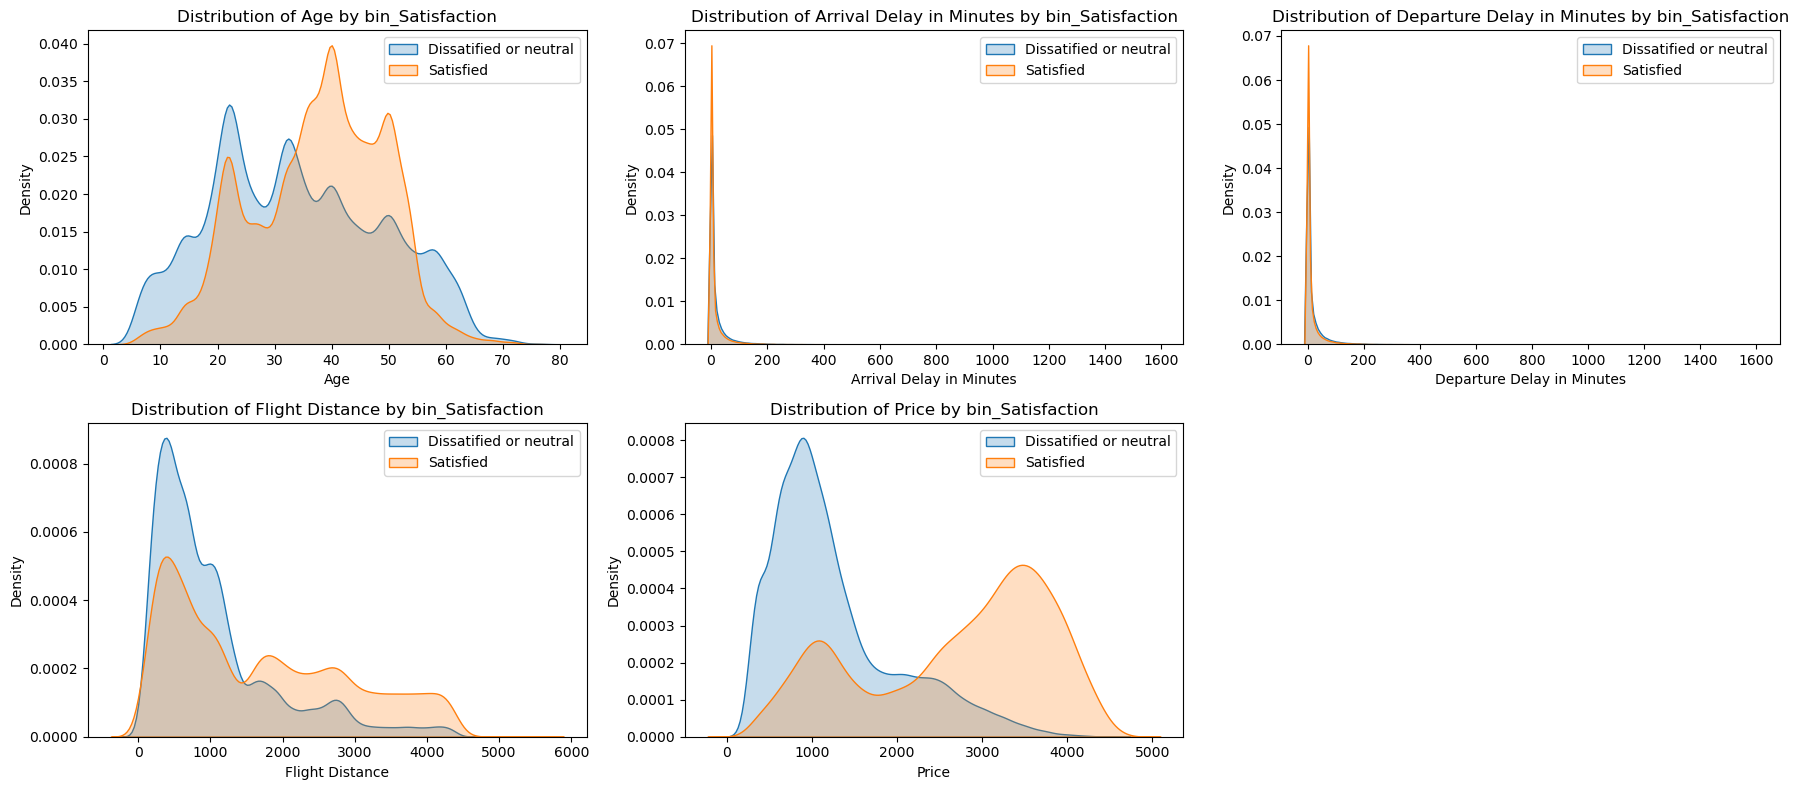

In [631]:
n_cols = 3
n_rows = (len(non_cat_variables) + n_cols - 1) // n_cols  # Calcul du nombre de lignes nécessaires

plt.figure(figsize=(6 * n_cols, 4 * n_rows))

for i, col in enumerate(non_cat_variables):
    plt.subplot(n_rows, n_cols, i + 1)  
    sns.kdeplot(data=df[df['bin_satisfaction'] == 0][col], label='Dissatified or neutral', shade=True)
    sns.kdeplot(data=df[df['bin_satisfaction'] == 1][col], label='Satisfied', shade=True)
    plt.title(f'Distribution of {col} by bin_Satisfaction')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

## D.1. Compléter l'analyse exploratoire de la question 1 en se focalisant sur les relations des différentes variables avec la variable cible. (price)

In [ ]:
n_cols = 3  # Nombre de graphiques par ligne
n_rows = (len(cat_variables) + n_cols - 1) // n_cols  # Calcul du nombre de lignes nécessaires

plt.figure(figsize=(6 * n_cols, 4 * n_rows))  # Ajuster la taille de la figure

for i, var in enumerate(cat_variables):
    plt.subplot(n_rows, n_cols, i + 1)  
    sns.countplot(x=var, hue=df['Price'].astype(str), palette="viridis", data=df)
    plt.title(f'Distribution of Price by {var}')
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()  # Ajuster automatiquement les sous-graphiques pour qu'ils ne se chevauchent pas
plt.show()

## Prétraitement général des datas

### Traiter les anomalies [NON FONCTIONNEL]

A FAIRE !!! gates = un seul zéro = on peut le supprimer

In [561]:
# ! A faire 
# Retirer les anomalies
class OutlierRemover(BaseEstimator, TransformerMixin):
  # X= toutes les columns du df

  #columns: col à prende en compte pour détecter les anomalies (il ne faut prendre que les variables numériques)
  def __init__(self, columns, factor = 1.5):
      self.columns = columns
      self.factor = factor
      self.kept_indices = None
      
  # Retire les anomalies pour les variables numériques
  def remove_outliers(self, X):
      indices_to_keep = X.index
      l = []
      for c in self.columns:
          Q1 = X[c].quantile(0.25)
          Q3 = X[c].quantile(0.75)
          delta = Q3-Q1
          lower_bound = Q1 - self.factor*delta
          upper_bound = Q3 + self.factor*delta
          condition = (X[c] >= lower_bound) & (X[c] <= upper_bound)
          #On met dans une liste les valeurs qui ne sont pas des anomalies
          column = X[c].loc[ condition ]
          l.append( pd.Series(column) )
          
      res = pd.concat(l, axis=1, join = "inner")

      self.kept_indices = res.index

      
      return X.loc[self.kept_indices]

  def fit(self, X, y=None):
      return self

  def transform(self, X):
      return self.remove_outliers(X)

outlier_pipeline = Pipeline(steps= [("outliers", OutlierRemover(columns= df.columns, factor = 1.5))])

### Création des datasets d'entrainement et de test

In [562]:
X = df.drop(targets, axis=1)

data_splits = {}

for target in targets:
    y = df[target]
    
    # Vérifier si la stratification est possible
    if y.nunique() > 1 and y.value_counts().min() > 1:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=314)
    else:
        print(f"Stratification not possible for target {target}. Using non-stratified split.")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=314)

    data_splits[f"{target}_X_test"] = X_test
    data_splits[f"{target}_X_train"] = X_train
    data_splits[f"{target}_y_train"] = y_train
    data_splits[f"{target}_y_test"] = y_test

    # print("🚀 ~ X_test:", data_splits[f"{target}_X_test"].shape)
    # print("🚀 ~ X_train:", data_splits[f"{target}_X_train"].shape)
    # print("🚀 ~ y_train:", data_splits[f"{target}_y_train"].shape)
    # print("🚀 ~ y_test:", data_splits[f"{target}_y_test"].shape)

Stratification not possible for target Price. Using non-stratified split.


### Formater les variables binaires
Comme elles ne sont pas sous la forme d'un boolean, on remplace chacune des 2 valeurs par 0 ou 1.

In [563]:
def set_bin_num(df):
    # Création d'un nouveau DataFrame pour les résultats
    result = df.copy()
    conditions = [
        (df['Gender'] == "Male") | (df['Customer Type'] == "disloyal Customer") | (df['Type of Travel'] == "Personal Travel")
    ]
    # Utiliser np.select pour assigner 0 ou 1 selon les conditions
    result['Gender'] = np.select(conditions, [0], default=1)
    result['Customer Type'] = np.select(conditions, [0], default=1)
    result['Type of Travel'] = np.select(conditions, [0], default=1)
    
    return result[['Gender', 'Customer Type', 'Type of Travel']]


In [564]:
from sklearn.pipeline import FunctionTransformer

bin_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", FunctionTransformer(set_bin_num, validate=False))
    ]
)

### Formater les variables ordinales

In [565]:
# # Traitement particulier pour inflight_wifi_service
# df['Wifi Applicable'] = df['Inflight service'].apply(lambda x: 0 if x == 0 else 1)
# df['Inflight service'] = df['Inflight service'].replace(0, np.nan)

# # Ajout de la nouvelle colonne aux variables binaires
# bin_variables.append("Wifi Applicable")

In [566]:
# Transforme les strings en nombres qui sont ordonnés entre eux
# class_pipeline = Pipeline(steps=[("encoder", OrdinalEncoder(categories=[["Eco", "Eco Plus", "Business"]]))])

ord_pipeline = Pipeline(steps=[
  ("imputer", SimpleImputer(strategy="most_frequent")),
  ("class_encoder", OrdinalEncoder(categories=[["Eco", "Eco Plus", "Business"]]))
])

In [567]:
# Une des targets est ordinale = il faut la prétraiter
satisfaction_encoder = OrdinalEncoder(categories=[["dissatisfied", "neutral", "satisfied"]])

data_splits["satisfaction_y_train"] = pd.DataFrame(
    satisfaction_encoder.fit_transform(data_splits["satisfaction_y_train"].to_frame()),
    columns=["satisfaction"]
)

data_splits["satisfaction_y_test"] = pd.DataFrame(
    satisfaction_encoder.transform(data_splits["satisfaction_y_test"].to_frame()),
    columns=["satisfaction"]
)
# Affichage pour vérification
print(data_splits["satisfaction_y_train"].head)
print(data_splits["satisfaction_y_test"].head)

<bound method NDFrame.head of         satisfaction
0                2.0
1                2.0
2                1.0
3                0.0
4                1.0
...              ...
103899           1.0
103900           2.0
103901           1.0
103902           1.0
103903           2.0

[103904 rows x 1 columns]>
<bound method NDFrame.head of        satisfaction
0               1.0
1               2.0
2               0.0
3               2.0
4               1.0
...             ...
25971           1.0
25972           0.0
25973           2.0
25974           0.0
25975           2.0

[25976 rows x 1 columns]>


### Pour les variables numériques:
Si la variable ressemble à une gaussienne, on normalize en fonction du standard (on centre le haut de la courbe de Gauss), si ce n'est pas le cas, on normalise avec le min et le max
=> Voir si les variables numériques suivent une loi normale (courbe gaussienne)

In [568]:
# Pour les variables numériques non gaussiennes
from sklearn.impute import KNNImputer


num_no_gauss_pipeline = Pipeline(steps=[
  ('imputer', KNNImputer()),
  ("scaler", MinMaxScaler())
])

In [569]:
# Pour les variables numériques gaussiennes
num_gauss_pipeline = Pipeline(steps=[
  ('imputer', KNNImputer()),
  ("scaler", StandardScaler())
  ])

### Définition de la pipeline dans l'ordre

In [570]:
preprocessor = ColumnTransformer(transformers= [
  ("ord", ord_pipeline, ord_variables),
  ("bin", bin_pipeline, bin_variables),
  ("num_no_gauss", num_no_gauss_pipeline, no_gauss_variables),
  ("num_gauss", num_gauss_pipeline, gauss_variables),
], remainder = "passthrough", verbose = 4, verbose_feature_names_out=False)

preprocessor.set_output(transform='pandas')

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('ord',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('class_encoder',
                                                  OrdinalEncoder(categories=[['Eco',
                                                                              'Eco '
                                                                              'Plus',
                                                                              'Business']]))]),
                                 ['Class']),
                                ('bin',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  FunctionTransformer(func=<function set_bin_...
                                  'Arrival Delay in Minutes',
                                  'Departure/Arrival time convenient',
                                  'Food and drink', 'Inflight entertainment']),
                                ('num_gauss',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Inflight wifi service',
                                  'Ease of Online booking', 'Gate location',
                                  'Online boarding', 'Seat comfort',
                                  'Cleanliness', 'Leg room service'])],
                  verbose=4, verbose_feature_names_out=False)

### Exécution de la pipeline sur les datasets d'entrainement et de test pour chaque target

In [571]:
print("X_train:")
print(data_splits[f"{target}_X_train"].shape)

print("X_test:")
print(data_splits[f"{target}_X_test"].shape)


for target in targets:
      data_splits[f"{target}_X_train_clean"] = preprocessor.fit_transform(data_splits[f"{target}_X_train"])
      data_splits[f"{target}_X_test_clean"] = preprocessor.transform(data_splits[f"{target}_X_test"])


X_train:
(103904, 22)
X_test:
(25976, 22)
[ColumnTransformer] ........... (1 of 5) Processing ord, total=   0.0s
[ColumnTransformer] ........... (2 of 5) Processing bin, total=   0.0s


[ColumnTransformer] .. (3 of 5) Processing num_no_gauss, total=   2.2s
[ColumnTransformer] ..... (4 of 5) Processing num_gauss, total=   2.9s
[ColumnTransformer] ..... (5 of 5) Processing remainder, total=   0.0s
[ColumnTransformer] ........... (1 of 5) Processing ord, total=   0.0s
[ColumnTransformer] ........... (2 of 5) Processing bin, total=   0.0s
[ColumnTransformer] .. (3 of 5) Processing num_no_gauss, total=   1.3s
[ColumnTransformer] ..... (4 of 5) Processing num_gauss, total=   1.5s
[ColumnTransformer] ..... (5 of 5) Processing remainder, total=   0.0s


In [572]:
# for target in targets:
#   print(data_splits[f"{target}_X_train_clean"].shape)
#   print(data_splits[f"{target}_X_test_clean"].shape)
#   print(data_splits[f"{target}_y_train"].shape)
#   print(data_splits[f"{target}_y_test"].shape)


for target in targets:
    data_splits[f"{target}_X_train_clean"]= pd.DataFrame(data_splits[f"{target}_X_train_clean"])
    data_splits[f"{target}_X_test_clean"]= pd.DataFrame(data_splits[f"{target}_X_test_clean"])
    data_splits[f"{target}_y_train"]= pd.DataFrame(data_splits[f"{target}_y_train"])
    data_splits[f"{target}_y_test"]= pd.DataFrame(data_splits[f"{target}_y_test"])

    # Afficher les formes des DataFrames pour chaque target
    print(f"Shapes for {target}:")
    print("df shape:", df.shape )
    print("X_train_clean shape:", data_splits[f"{target}_X_train_clean"].shape)
    print("X_test_clean shape:", data_splits[f"{target}_X_test_clean"].shape)
    print("y_train shape:", data_splits[f"{target}_y_train"].shape)
    print("y_test shape:", data_splits[f"{target}_y_test"].shape)
    
    # # Vérifier les types de données dans X_train_clean et X_test_clean
    # print(f"Data types for {target}_X_train_clean:")
    # print(data_splits[f"{target}_X_train_clean"].dtypes)
    # print(f"Data types for {target}_X_test_clean:")
    # print(data_splits[f"{target}_X_test_clean"].dtypes)
    
    # Vérification supplémentaire pour s'assurer qu'aucune colonne ne contient de type 'object'
    if (data_splits[f"{target}_X_train_clean"].dtypes == 'object').any() or \
       (data_splits[f"{target}_X_test_clean"].dtypes == 'object').any():
        print(f"Warning: {target} train or test set contains non-numeric data types.")
    else:
        print(f"All columns in {target} train and test sets are numeric.")


Shapes for satisfaction:
df shape: (129880, 24)
X_train_clean shape: (103904, 22)
X_test_clean shape: (25976, 22)
y_train shape: (103904, 1)
y_test shape: (25976, 1)
All columns in satisfaction train and test sets are numeric.
Shapes for Price:
df shape: (129880, 24)
X_train_clean shape: (103904, 22)
X_test_clean shape: (25976, 22)
y_train shape: (103904, 1)
y_test shape: (25976, 1)
All columns in Price train and test sets are numeric.


### Vérification que la modification ait bien été faite

In [573]:
# # Vérification des valeurs possibles pour chaque variable explicative
# for dataset in data_splits:
#     print("\n") 
#     print(dataset)
#     print("\n") 

#     for column in df.columns:
#       print(f"Value counts for {column}:")
#       print(df[column].value_counts())
#       print("\n") 

counts = data_splits["satisfaction_X_train_clean"]["Class"].value_counts()
print(counts.index)  # Affichera les valeurs de l'index et leur type
print(counts.values)  # Affichera les valeurs et leur type

# print("Type de l'index :", type(counts.index))
print("Type des valeurs de la série :", counts.dtype)  # Affiche 'int64', confirmant que les valeurs sont des entiers


Index([2.0, 0.0, 1.0], dtype='float64', name='Class')
[49659 46767  7478]
Type des valeurs de la série : int64


### Gérer la nouvelle colonne bin_satisfaction de la question 3.

In [578]:
for type in ["train", "test"]:
    df_key_train = f"satisfaction_y_{type}"
    df_not_bin = data_splits[df_key_train].copy()  # Faites une copie pour éviter les modifications en place

    # Assurez-vous que les valeurs sont des entiers si elles sont stockées en tant que floats
    df_not_bin['satisfaction'] = df_not_bin['satisfaction'].astype(int)

    # Remplacer 1 par 0 et 2 par 1
    df_not_bin.loc[df_not_bin['satisfaction'] == 1, 'satisfaction'] = 0
    df_not_bin.loc[df_not_bin['satisfaction'] == 2, 'satisfaction'] = 1

    data_splits[f"bin_satisfaction_y_{type}"] = df_not_bin

# Affichage pour vérifier les résultats
print("Unique values in bin_satisfaction_y_train:", data_splits["bin_satisfaction_y_train"]['satisfaction'].unique())
print("Unique values in bin_satisfaction_y_test:", data_splits["bin_satisfaction_y_test"]['satisfaction'].unique())


Unique values in bin_satisfaction_y_train: [1 0]
Unique values in bin_satisfaction_y_test: [0 1]


### Enregistrer

In [579]:
for target in targets:
  pd.DataFrame(data_splits[f"{target}_X_train_clean"]).to_csv(f"./{target}_X_train_clean.csv", index=False)
  pd.DataFrame(data_splits[f"{target}_X_test_clean"]).to_csv(f"./{target}_X_test_clean.csv", index=False)
  pd.DataFrame(data_splits[f"{target}_y_train"]).to_csv(f"./{target}_y_train.csv", index=False)
  pd.DataFrame(data_splits[f"{target}_y_test"]).to_csv(f"./{target}_y_test.csv", index=False)

# Enregistrement des variables cibles y pour bin_satisfaction
  pd.DataFrame(data_splits["bin_satisfaction_y_train"]).to_csv(f"./bin_satisfaction_y_train.csv", index=False)
  pd.DataFrame(data_splits["bin_satisfaction_y_test"]).to_csv(f"./bin_satisfaction_y_test.csv", index=False)
